# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


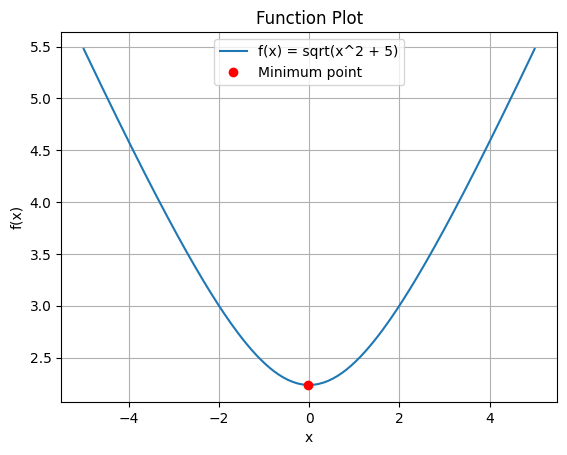

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Define the function f(x).
def f(x):
    func = np.sqrt(x**2 + 5)
    return func

# Plot the function f(x), np.linspace might be helpful.
x = np.linspace(-5, 5, 200) # plotting over interval [-5, 5]
plt.plot(x, f(x), label = 'f(x) = sqrt(x^2 + 5)' )

# plot min
plt.plot(x[np.argmin(f(x))], np.min(f(x)), 'ro', label = 'Minimum point')

plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)



 x_T values for alpha: 7.029365878612964e-13


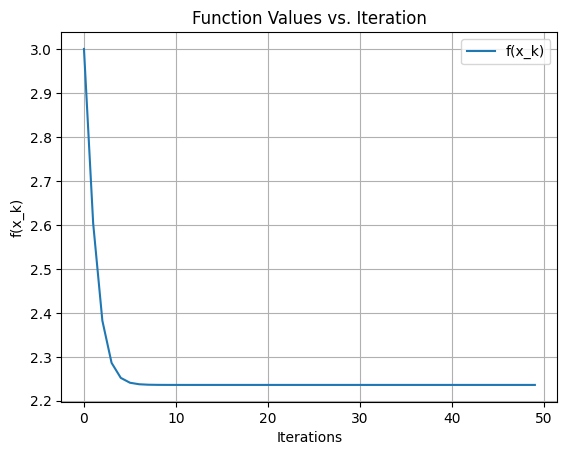

In [ ]:
# Define the derivative of the function f(x), for gradient descent
def derivative_f(x):
    f_prime = x / np.sqrt(x**2 + 5)
    return f_prime

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

# set up/assign initial values
x_0 = 5/5 + 1   # my student ID ends with 5
step_size = 1
num_iterations = 50
alpha = 1

# Run gradient descent by calling the function
x_values = [x_0]

for k in range(1, num_iterations):
    x_ = x_values[k-1] - ( alpha * derivative_f(x_values[k-1]) )
    x_values.append(x_)

# report x_T by printing out the value
print(f"\n x_T values for alpha: {x_values[-1]}")

# Plot the f(x_k) values vs. iteration number
plt.plot(range(num_iterations), 
        [f(x) for x in x_values], 
        label = 'f(x_k)')
.
plt.title('Function Values vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('f(x_k)')
plt.grid(True)
plt.legend()

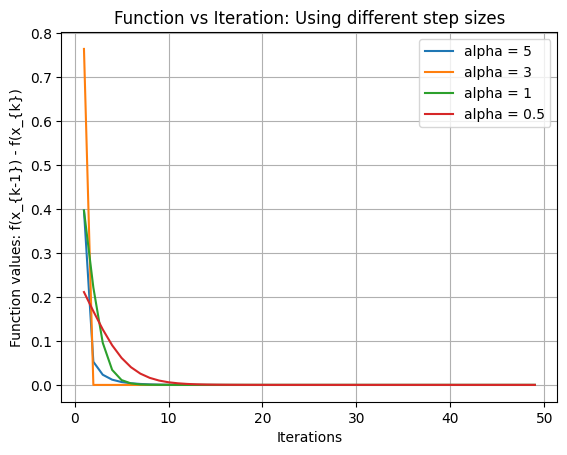

In [49]:
# create a list containing step sizes
step_size = [5, 3, 1, 0.5]

# loop through the step sizes and perform GD and record results
for alpha in step_size:
    x_0 = 5/5 +1
    x_values = [x_0]
    func_difference = []

    for k in range(1, num_iterations):
        x_ = x_values[k-1] - ( alpha * derivative_f(x_values[k-1]) )
        x_values.append(x_)
        func_difference.append(f(x_values[k-1]) - f(x_))

    # plot multiple curves in a single graph
    # this plot is for current alpha value, before moving back to the first for-loop
    plt.plot(range(1, num_iterations), func_difference, label = f'alpha = {alpha}')

plt.title('Function vs Iteration: Using different step sizes')
plt.xlabel('Iterations')
plt.ylabel('Function values: f(x_{k-1}) - f(x_{k})')
plt.legend()
plt.grid(True)


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 3.9522050641157587
Weights: 3.9896499856611474 0.46520146187414196


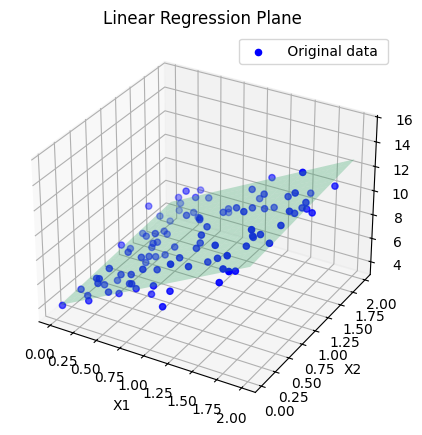

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(65)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
new_X = np.column_stack( (np.ones(100) , X))


# Find theta using the normal equation: this will help us find the coefficients of the linear regression equation
theta = np.linalg.inv( np.transpose(new_X) @ new_X ) @ (np.transpose(new_X) @ y)


# Print the intercept and coefficients of the regression plane
intercept = theta[0]
weight1, weight2 = theta[1], theta[2]

# print these coefficients
print('Intercept:', intercept)
print('Weights:', weight1, weight2)


# Plot the generated data and the regression plane

fig = plt.figure(figsize=(12, 5))

# rename the columns of X
X1 = X[:, 0]
X2 = X[:, 1]

# 3D scatter plot with regression plane
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X1, X2, y, c='blue', label = ' Original data ')

# Create meshgrid for plane
x1_pred = np.linspace(X1.min(), X1.max(), 20)
x2_pred = np.linspace(X2.min(), X2.max(), 20)

X1_pred, X2_pred = np.meshgrid(x1_pred, x2_pred)

Z_pred = intercept + weight1 * X1_pred + weight2 * X2_pred

# Plot regression plane
ax1.plot_surface(X1_pred, X2_pred, Z_pred, alpha=0.3, color='mediumseagreen')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y')
ax1.set_title('Linear Regression Plane')
ax1.legend()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [202]:
X = np.random.rand(2, 100)

X

array([[0.72168874, 0.84862072, 0.00607233, 0.01848681, 0.35672333,
        0.17563152, 0.47290939, 0.85336508, 0.69093992, 0.81524765,
        0.73492388, 0.17713993, 0.85249313, 0.61511477, 0.70572942,
        0.10156836, 0.05937517, 0.43066236, 0.0553892 , 0.83026208,
        0.35945864, 0.68770757, 0.12080326, 0.16267975, 0.06157435,
        0.85991739, 0.85639623, 0.45591192, 0.13903341, 0.58729627,
        0.93487866, 0.695829  , 0.45046108, 0.19697699, 0.841472  ,
        0.20897393, 0.62055234, 0.68422402, 0.87275394, 0.23639606,
        0.52685508, 0.22159822, 0.1744189 , 0.44066833, 0.94836546,
        0.61885279, 0.90850748, 0.06414425, 0.9379728 , 0.96173331,
        0.16453782, 0.89514365, 0.03047455, 0.22588466, 0.07624258,
        0.5309713 , 0.02987756, 0.97899708, 0.95928443, 0.76025558,
        0.13815634, 0.60427182, 0.89140637, 0.37024616, 0.64933876,
        0.1907464 , 0.19393237, 0.11051064, 0.99081314, 0.8778841 ,
        0.21141277, 0.99289151, 0.98758556, 0.86

In [210]:
X[:, 80:].shape

(2, 20)

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# I am rebuilding this code into a function, to enable me build up guesses to tune the learning rate and number of epochs
def testing_func(learning_rate, num_epochs):

    # defined the sigmoid function: 1 / (1+e^-z)
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    # fixed random numbers, when generated
    np.random.seed(595)

    # Set the predictor, 2 columns of 100 numbers each
    X = np.random.rand(2, 100)

    # set the true "weight" solution/values 
    w_true = np.array([1.5, -2.5])
    # set the true "bias" or intercept solution/value
    b_true = 1.0  # True bias

    # use the above defined values to solve the sigmoid function to find the probabilities
    probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
    
    # Set a threshold for the output variable: only select results with more than 50% probabilities
    Y = (probabilities > 0.5).astype(int)

    # 
    X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

    # partition the test and training data
    X_train, X_test = X[:, :80], X[:, 80:]   # x_train: takes all until the 80th column, X_test: takes the remaining columns start from column-81
    Y_train, Y_test = Y[:80], Y[80:]  # y_train and y_test data was splitted the same way as x

    # initialize / create the weight and baias 
    w = np.zeros(X.shape[0])
    b = 0.0

    # learning_rate = 5.95 # my improved attempt - 0.9
    # num_epochs = 595  # 700

    # Training loop
    for epoch in range(num_epochs):

        # sigmoid function
        A_train = sigmoid(np.dot(w.T, X_train) + b)
        
        # defined the derivative wrt weight and bais
        dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
        dJdb = np.mean(A_train - Y_train)

        # update the weight and baias
        w -= learning_rate * dJdw
        b -= learning_rate * dJdb

    # trained model
    A_train = sigmoid(np.dot(w.T, X_train) + b)
   
    # predictions of the trained model
    predictions_train = (A_train > 0.5).astype(int)

    # test model
    A_test = sigmoid(np.dot(w.T, X_test) + b)

    # predictions of the test model
    predictions_test = (A_test > 0.5).astype(int)

    # check the accuracy of the trained model
    train_accuracy = np.mean(predictions_train == Y_train)

    # check the accuract of the test model
    test_accuracy = np.mean(predictions_test == Y_test)

#    print(f"Training Set Accuracy: {train_accuracy:.2f}")
#    print(f"Test Set Accuracy: {test_accuracy:.2f}")
   
    # return the accuracy of both the trained model and test model, in 5 decimal places
    return format(train_accuracy, '.4f'), format(test_accuracy, '.4f')

In [216]:
# check if the built function works
# test the function with pre-existing ('learning rate', 'number of epochs')

i, j = testing_func(5.95, 595)

print('train accuracy', i)
print('test accuracy', j)

train accuracy 0.8875
test accuracy 0.9500


## Build a function to:
* Test possible numbers for learning rate &  number of epochs
* This is done, using the defined function above

In [224]:
def tuning_learningRate_Epochs(learning_rate_lower, learning_rate_upper, epoch_lower, epoch_upper, number_of_points):

    # define a range of possible 'learning rates': 20 distinct numbers from 0 to 1
    learning_rate = np.linspace(learning_rate_lower, 
                                learning_rate_upper, 
                                number_of_points)

    # define a range of possible 'number of epochs':  20 distinct numbers from 100 to 1000
    num_epochs = np.linspace(epoch_lower, 
                             epoch_upper, 
                             number_of_points)

    # store the results
    train_accuracy = [ ]
    test_accuracy = [ ]

    # for every learning rate, test each epoch size on the testing function
    # then return the training accurancy and testing accuracy
    for learn in learning_rate:
        for epoc in num_epochs:
            epoc = int(epoc)
            train_a, test_a = testing_func(learn, epoc)
            train_accuracy.append(train_a)
            test_accuracy.append(test_a)

    # duplicate the learning rate to help form a comprehensive dataset
    new_learning_rate = [ ]

    # reproduce 20 repetitions of each learning rate: to match the final output/table
    for i in learning_rate:
        for _ in range(len(learning_rate)):
            new_learning_rate.append(float(i))

    # epoch reproduction
    new_num_epochs = [ ]

    # produce 20 repetitions of the 20 number of epochs. Helps to form the result df/table
    for _ in range(len(num_epochs)):
        for j in num_epochs:
            j = int(j)
            new_num_epochs.append(j)

    # form a dataframe to easily see our results 
    df = pd.DataFrame({ 'Learning Rate': new_learning_rate,
                        'Number of epochs': new_num_epochs,
                        'Train Accuracy': train_accuracy,
                        'Test Accuracy': test_accuracy })


    # filter for the best result
    df_filt = df[(df['Test Accuracy'] >= '0.9500') & (df['Train Accuracy'] >= '0.900') ]




    # What is the total number of best result possible: 
    length_of_result = len(df[(df['Test Accuracy'] >= '0.9500') & (df['Train Accuracy'] >= '0.900') ])

    print("\n")
    print(f" There are {length_of_result} possible Learning Rate and Number of epochs that will give 95% Test Accuracy of our model")
    print("\n")


    # print the top 10 best result
    return df_filt.head(10)


In [225]:
tuning_learningRate_Epochs(learning_rate_lower= 1,
                           learning_rate_upper= 10,
                           epoch_lower= 100,
                           epoch_upper= 1000,
                           number_of_points= 20)



 There are 28 possible Learning Rate and Number of epochs that will give 95% Test Accuracy of our model




,Learning Rate,Number of epochs,Train Accuracy,Test Accuracy
5,1.000000,336,0.9000,0.9500
6,1.000000,384,0.9000,0.9500
7,1.000000,431,0.9000,0.9500
8,1.000000,478,0.9000,0.9500
9,1.000000,526,0.9000,0.9500
10,1.000000,573,0.9000,0.9500
11,1.000000,621,0.9000,0.9500
23,1.473684,242,0.9000,0.9500
24,1.473684,289,0.9000,0.9500
25,1.473684,336,0.9000,0.9500


In [192]:
# Pick one of the above best points

learning_rate = 1.474
num_epochs = 336

In [227]:
# defined the sigmoid function: 1 / (1+e^-z)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
# fixed random numbers, when generated
np.random.seed(595)

# Set the predictor, 2 columns of 100 numbers each
X = np.random.rand(2, 100)

# set the true "weight" solution/values 
w_true = np.array([1.5, -2.5])
# set the true "bias" or intercept solution/value
b_true = 1.0  # True bias

# use the above defined values to solve the sigmoid function to find the probabilities
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
    
# Set a threshold for the output variable: only select results with more than 50% probabilities
Y = (probabilities > 0.5).astype(int)

# 
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# partition the test and training data
X_train, X_test = X[:, :80], X[:, 80:]   # x_train: takes all until the 80th column, X_test: takes the remaining columns start from column-81
Y_train, Y_test = Y[:80], Y[80:]  # y_train and y_test data was splitted the same way as x

# initialize / create the weight and baias 
w = np.zeros(X.shape[0])
b = 0.0

# learning_rate = 5.95 # my improved attempt - 0.9
# num_epochs = 595  # 700

# Training loop
for epoch in range(num_epochs):

    # sigmoid function
    A_train = sigmoid(np.dot(w.T, X_train) + b)
        
    # defined the derivative wrt weight and bais
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # update the weight and baias
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# trained model
A_train = sigmoid(np.dot(w.T, X_train) + b)
   
# predictions of the trained model
predictions_train = (A_train > 0.5).astype(int)

# test model
A_test = sigmoid(np.dot(w.T, X_test) + b)

# predictions of the test model
predictions_test = (A_test > 0.5).astype(int)

# check the accuracy of the trained model
train_accuracy = np.mean(predictions_train == Y_train)

# check the accuract of the test model
test_accuracy = np.mean(predictions_test == Y_test)

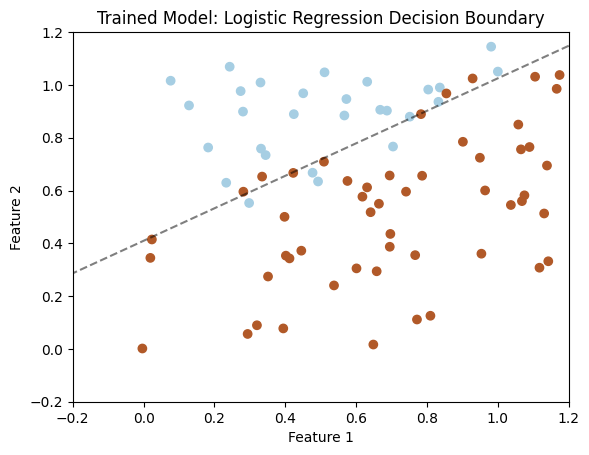

In [235]:
# Plot the TRAIN function
 
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# set the axis/ boundary
ax = plt.gca()   # current axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# build a meshgrid, using the defined sigmoid functions and parameters
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b 
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

# label the TRAIN function plots
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Trained Model: Logistic Regression Decision Boundary')
plt.show()

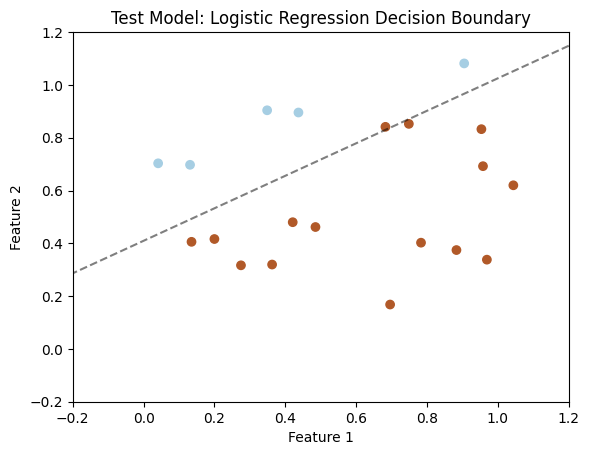

In [234]:
# plot the TEST Function

plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# set the axis/ boundary
ax = plt.gca()  # current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# build a meshgrid, using the defined sigmoid functions and parameters
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

# label the TEST function plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Model: Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5